In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

In [2]:
df = pd.read_csv("Heart_Disease_Prediction.csv")

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.shape

(270, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [6]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [7]:
df.isna().sum()  # Check missing values in each column



Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [8]:
print(f"Duplicate rows: {df.duplicated().sum()}")


Duplicate rows: 0


In [9]:
print(df.nunique())  # Check unique values in each column


Age                         41
Sex                          2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64


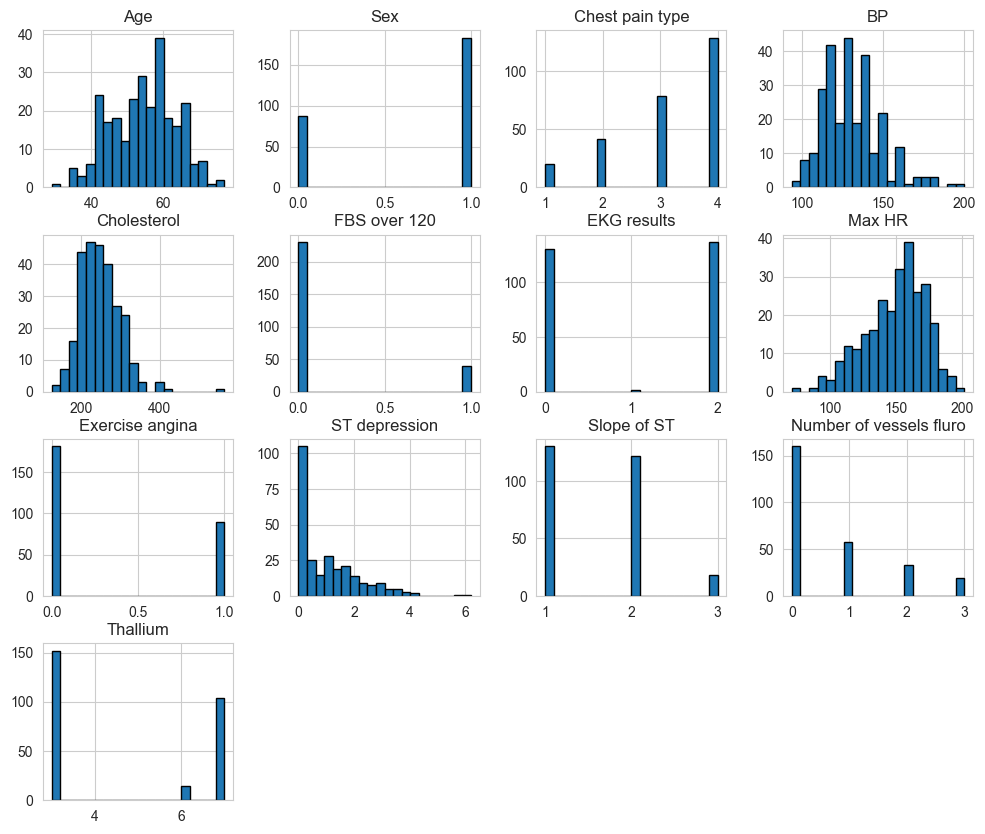

In [10]:

# Set style for better visuals
sns.set_style("whitegrid")

# Plot histograms for all numerical columns
df.hist(figsize=(12, 10), bins=20, edgecolor="black")
plt.show()

In [11]:
### Histogram plots display the distribution of different features in the dataset. Here’s an analysis of each:
#📊 Numerical Features:
  #1. Age – Normally distributed with most patients between 40-65 years old.

  #2. BP (Blood Pressure) – Appears to have a normal distribution centered around 130-150 mmHg.

   #3. Cholesterol – Right-skewed distribution, meaning some individuals have very high cholesterol levels.

    #4. Max HR (Maximum Heart Rate Achieved) – Normal distribution peaking around 140-160 bpm.

    #5. ST Depression – Right-skewed; most values are near 0, but some are much higher.



#📊 Categorical Features:
  #1. Sex – More males (1) than females (0).

  #2. Chest Pain Type (CP) – Type 4 (asymptomatic) is most common.

  #3. FBS over 120 – Most patients have fasting blood sugar ≤ 120 (0), with fewer having high FBS (1).

  #4. EKG Results – Most results are normal (0), with fewer cases in categories 1 and 2.

  #5. Exercise-Induced Angina – More patients don’t experience angina (0) than those who do (1).

  #6. Slope of ST Segment – Type 1 and Type 2 slopes are more frequent, with few Type 3.

  #7. Number of Vessels Colored by Fluoroscopy – Skewed towards fewer vessels (0-1 are common).

  #8. Thallium Test (Thal) – Category 3 and 7 are dominant.

In [12]:
#Key Observations from the Heatmap
#1. Age vs. Max HR: Correlation of -0.40 suggests that as age increases, maximum heart rate tends to decrease.

#2. Exercise Angina vs. Chest Pain Type: Correlation of 0.35 indicates that people experiencing exercise-induced angina may have a certain chest pain type.

#3. ST Depression vs. Slope of ST: Correlation of 0.61 shows a strong relationship between ST depression and the slope of the ST segment.

#4. Number of Vessels Fluoroscopy vs. Age: Correlation of 0.36 suggests older individuals tend to have more affected vessels.

#5. Thallium vs. Sex: Correlation of 0.39 indicates a relationship between Thallium test results and gender.

In [13]:
print(df.dtypes)

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object


In [14]:
print(df.columns)

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')


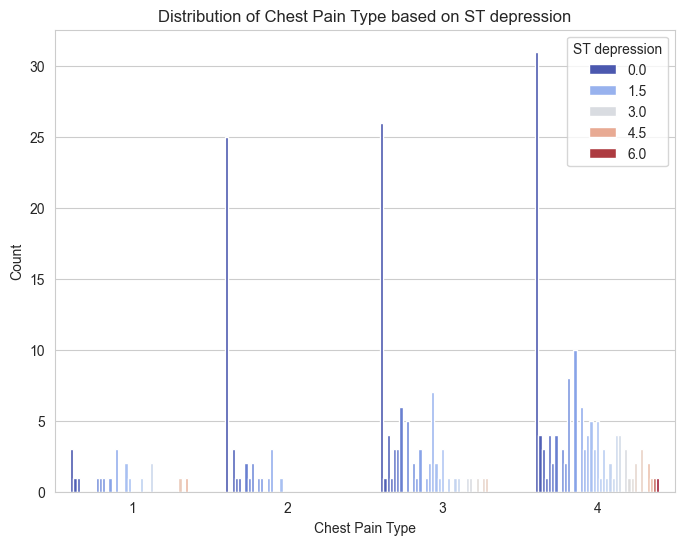

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Chest pain type', hue='ST depression', palette='coolwarm')

plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Type based on ST depression')
plt.show()

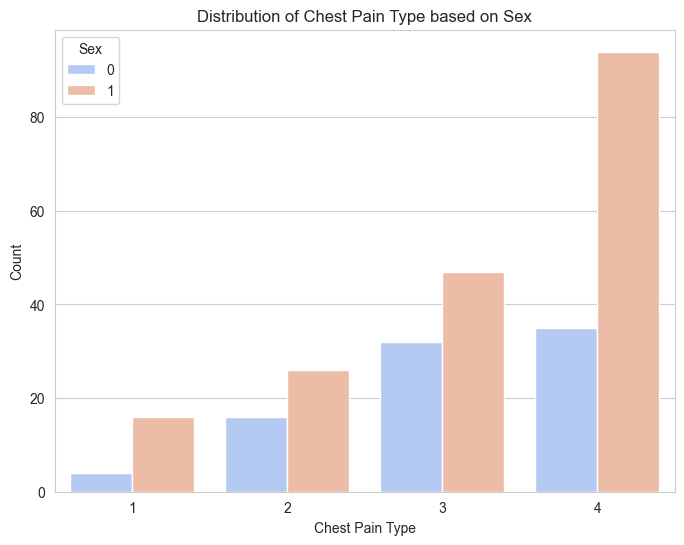

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Chest pain type', hue='Sex', palette='coolwarm')

plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Type based on Sex')
plt.show()

C:\Users\prate\AppData\Local\Temp\ipykernel_10552\1775154128.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\prate\AppData\Local\Temp\ipykernel_10552\1775154128.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


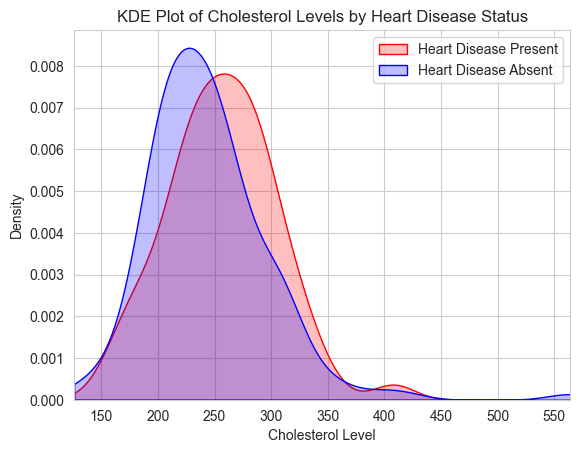

In [17]:
sns.kdeplot(
    df[df["Heart Disease"] == "Presence"]["Cholesterol"], 
    label="Heart Disease Present", 
    shade=True, 
    color="red",
    clip=[126, 564]
)
sns.kdeplot(
    df[df["Heart Disease"] == "Absence"]["Cholesterol"], 
    label="Heart Disease Absent", 
    shade=True, 
    color="blue",
    clip=[126, 564]
)

plt.xlim(126, 564)
plt.xlabel("Cholesterol Level")
plt.ylabel("Density")
plt.title("KDE Plot of Cholesterol Levels by Heart Disease Status")
plt.legend()
plt.show()

## Preprocessing for Data Modeling 

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
encoder = LabelEncoder()
df['Heart Disease'] = encoder.fit_transform(df['Heart Disease'])
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


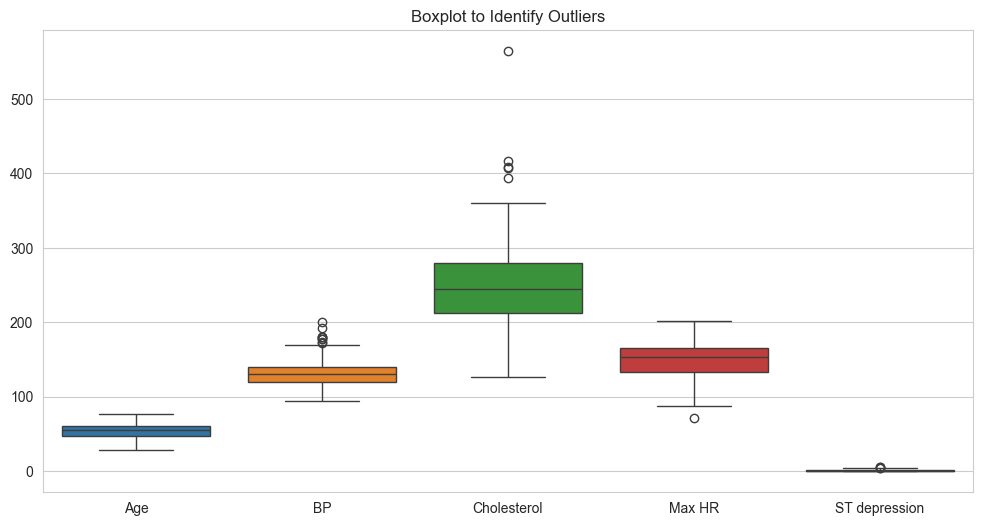

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["Age", "BP", "Cholesterol", "Max HR", "ST depression"]])
plt.title("Boxplot to Identify Outliers")
plt.show()


In [21]:


def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Check outliers for each numerical feature
for col in ["Age", "BP", "Cholesterol", "Max HR", "ST depression"]:
    print(f"Outliers in {col}:\n", detect_outliers_iqr(df, col))


Outliers in Age:
 Empty DataFrame
Columns: [Age, Sex, Chest pain type, BP, Cholesterol, FBS over 120, EKG results, Max HR, Exercise angina, ST depression, Slope of ST, Number of vessels fluro, Thallium, Heart Disease]
Index: []
Outliers in BP:
      Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
58    59    0                4  174          249             0            0   
87    59    1                1  178          270             0            2   
110   55    0                4  180          327             0            1   
117   56    0                4  200          288             1            2   
144   54    1                2  192          283             0            2   
159   66    0                4  178          228             1            0   
165   64    0                4  180          325             0            0   
240   68    1                3  180          274             1            2   
265   52    1                3  172         

In [22]:
for col in ["Age", "BP", "Cholesterol", "Max HR", "ST depression"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [23]:
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


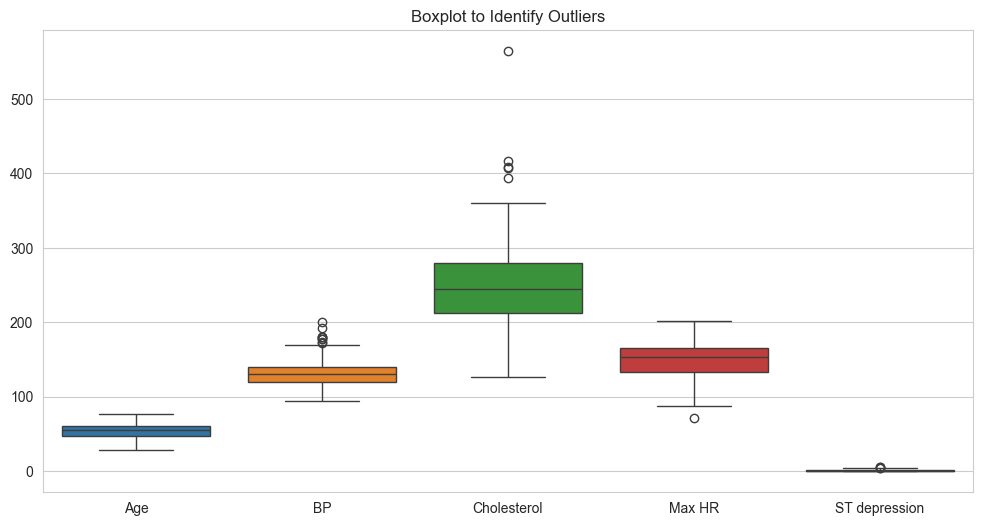

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["Age", "BP", "Cholesterol", "Max HR", "ST depression"]])
plt.title("Boxplot to Identify Outliers")
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for binary categorical features
encoder = LabelEncoder()
data["Sex"] = encoder.fit_transform(data["Sex"])
data["Exercise angina"] = encoder.fit_transform(data["Exercise angina"])

# One-Hot Encoding for multi-category features
data = pd.get_dummies(data, columns=["Chest pain type", "EKG results", "Slope of ST", "Thallium"], drop_first=True)


C:\Users\prate\AppData\Local\Temp\ipykernel_10552\23537312.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sex"] = encoder.fit_transform(data["Sex"])
C:\Users\prate\AppData\Local\Temp\ipykernel_10552\23537312.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Exercise angina"] = encoder.fit_transform(data["Exercise angina"])


In [26]:
data.head()

,Age,Sex,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Number of vessels fluro,Heart Disease,Chest pain type_2,Chest pain type_3,Chest pain type_4,EKG results_1,EKG results_2,Slope of ST_2,Slope of ST_3,Thallium_6,Thallium_7
0,70,1,130,322,0,109,0,2.4,3,1,False,False,True,False,True,True,False,False,False
1,67,0,115,564,0,160,0,1.6,0,0,False,True,False,False,True,True,False,False,True
2,57,1,124,261,0,141,0,0.3,0,1,True,False,False,False,False,False,False,False,True
3,64,1,128,263,0,105,1,0.2,1,0,False,False,True,False,False,True,False,False,True
4,74,0,120,269,0,121,1,0.2,1,0,True,False,False,False,True,False,False,False,False


In [27]:
print(data.isnull().sum())  

Age                        0
Sex                        0
BP                         0
Cholesterol                0
FBS over 120               0
Max HR                     0
Exercise angina            0
ST depression              0
Number of vessels fluro    0
Heart Disease              0
Chest pain type_2          0
Chest pain type_3          0
Chest pain type_4          0
EKG results_1              0
EKG results_2              0
Slope of ST_2              0
Slope of ST_3              0
Thallium_6                 0
Thallium_7                 0
dtype: int64


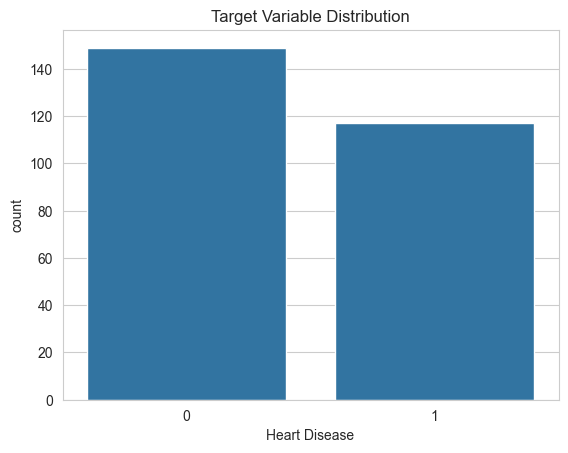

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=data["Heart Disease"])
plt.title("Target Variable Distribution")
plt.show()


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split Data
X = data.drop(columns=["Heart Disease"])  # Features
y = data["Heart Disease"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8703703703703703
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        28
           1       0.91      0.81      0.86        26

    accuracy                           0.87        54
   macro avg       0.88      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54



E:\pythonds\dsenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# Accuracy = 0.87 (87%)
  #The model correctly predicts 87% of the cases.

In [31]:
# Precision
  #Class 0 (No Disease) Precision = 0.84 → When the model predicts No Disease (0), it's correct 84% of the time.

 #Class 1 (Disease) Precision = 0.91 → When the model predicts Disease (1), it's correct 91% of the time.

In [32]:
# Recall (Sensitivity, True Positive Rate)

  #Class 0 Recall = 0.93 → Out of all actual No Disease cases, the model correctly identifies 93% of them.

  #Class 1 Recall = 0.81 → Out of all actual Disease cases, the model correctly identifies 81% of them.

  # Class 1 recall is a bit low (81%), meaning the model misses 19% of actual heart disease cases.

In [33]:
# F1-score (Balance between Precision & Recall)

  #F1-score is high (~0.87 overall), meaning a good balance between precision & recall.

In [34]:
# Support
  #The number of actual instances of each class in the test set (28 for Class 0, 26 for Class 1).

## Save the Trained Model

In [35]:
import joblib

joblib.dump(lr_model, "heart_disease_model.pkl")  # Save the model


['heart_disease_model.pkl']

In [36]:
loaded_model = joblib.load("heart_disease_model.pkl")


In [37]:
loaded_model

LogisticRegression()

## Make Predictions on New Data

In [38]:
new_patient = [[63, 1, 140, 233, 1, 150, 0, 2.3, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0]]  # Example input

prediction = loaded_model.predict(new_patient)
print("Heart Disease Prediction:", "Yes" if prediction[0] == 1 else "No")


Heart Disease Prediction: No


E:\pythonds\dsenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
